In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn 


In [108]:
INPUT_FILE_PATH = './dataset.csv'
all_data = pd.read_csv(INPUT_FILE_PATH)
all_data.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [109]:
# видалення усього непотрібного та перейменування колонок
all_data.drop('ADDRESS', axis=1, inplace=True)
all_data.drop('NEAREST_STN', axis=1, inplace=True)
all_data.drop('SUBURB', axis=1, inplace=True)
all_data.drop('DATE_SOLD', axis=1, inplace=True)
all_data.drop('POSTCODE', axis=1, inplace=True)
all_data.drop('LATITUDE', axis=1, inplace=True)
all_data.drop('LONGITUDE', axis=1, inplace=True)
all_data.drop('NEAREST_SCH', axis=1, inplace=True)
all_data.drop('NEAREST_SCH_RANK', axis=1, inplace=True)
all_data.rename(columns={
    'CBD_DIST': 'BUSINESS_DIST', 
    'NEAREST_STN_DIST': 'TRAIN_STATION_DIST', 
    'NEAREST_SCH_DIST': 'SCHOOL_DIST'}, inplace=True)

In [110]:
print('MISSIN VALUES :\n')
print(all_data.isnull().sum())

MISSIN VALUES :

PRICE                    0
BEDROOMS                 0
BATHROOMS                0
GARAGE                2478
LAND_AREA                0
FLOOR_AREA               0
BUILD_YEAR            3155
BUSINESS_DIST            0
TRAIN_STATION_DIST       0
SCHOOL_DIST              0
dtype: int64


In [111]:
# заповнення порожніх значень
all_data['GARAGE'] = all_data['GARAGE'].fillna(all_data['GARAGE'].median())
all_data['BUILD_YEAR'] = all_data['BUILD_YEAR'].fillna(all_data['BUILD_YEAR'].quantile(0.75))

In [112]:
from datetime import datetime, date

def age(buid_year):
    current_year = date.today().year
    return current_year - buid_year

In [113]:
all_data['AGE'] = all_data['BUILD_YEAR'].apply(age)
all_data.drop('BUILD_YEAR', axis=1, inplace=True)

In [114]:
all_data.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUSINESS_DIST,TRAIN_STATION_DIST,SCHOOL_DIST,AGE
0,565000,4,2,2.0,600,160,18300,1800,0.828339,19.0
1,365000,3,2,2.0,351,139,26900,4900,5.524324,9.0
2,287000,3,1,1.0,719,86,22600,1900,1.649178,43.0
3,255000,2,1,2.0,651,59,17900,3600,1.571401,69.0
4,325000,4,1,2.0,466,131,11200,2000,1.514922,24.0


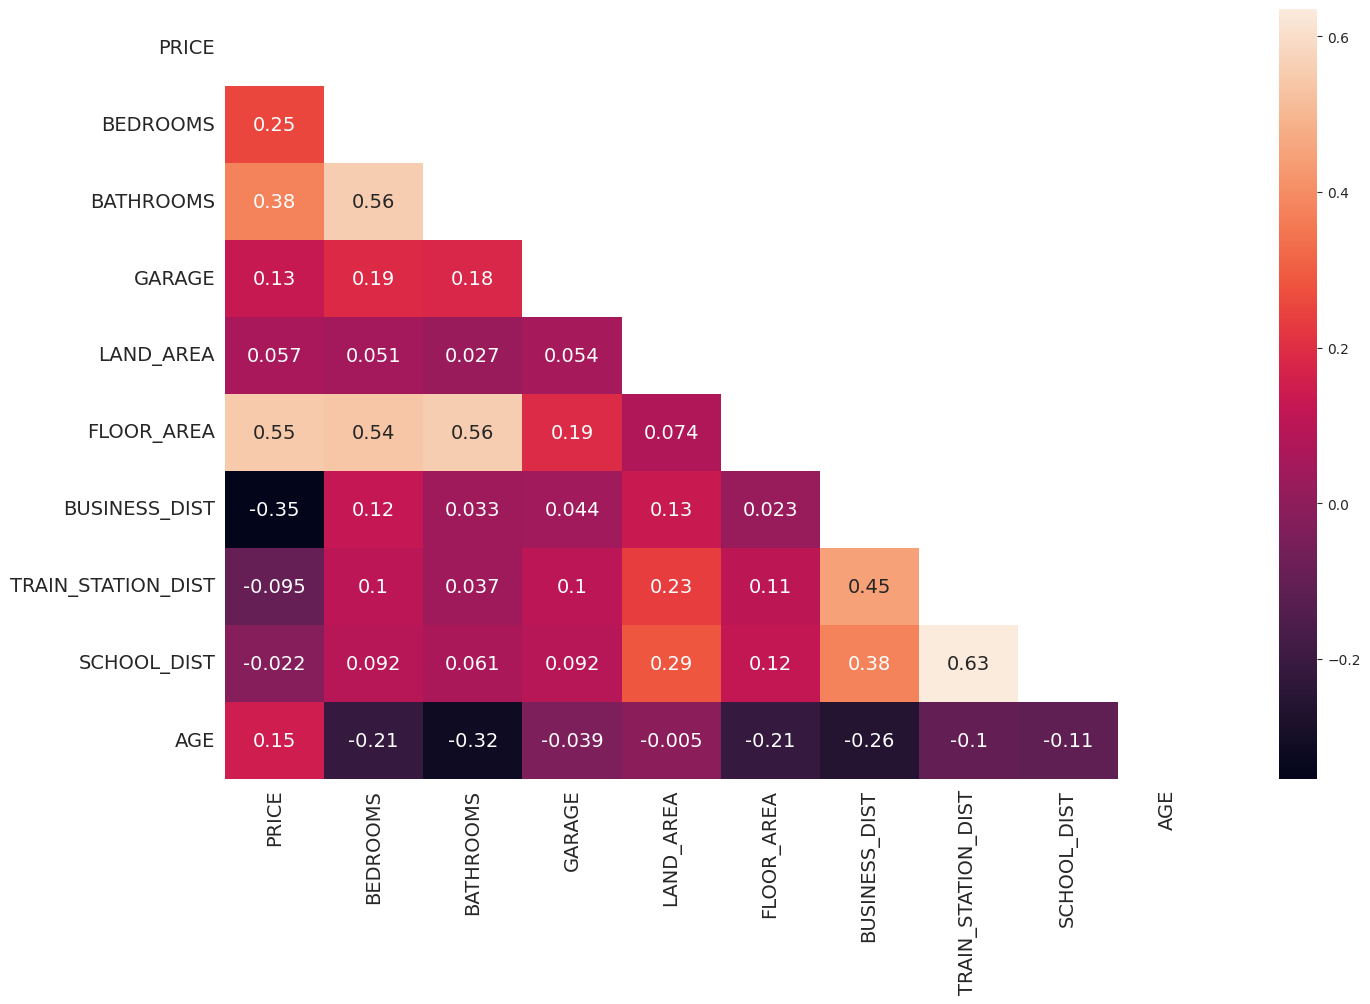

In [115]:
# зробити кращий графік взаємної кореляції
mask = np.zeros_like(all_data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(16,10))
seaborn.heatmap(all_data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
seaborn.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


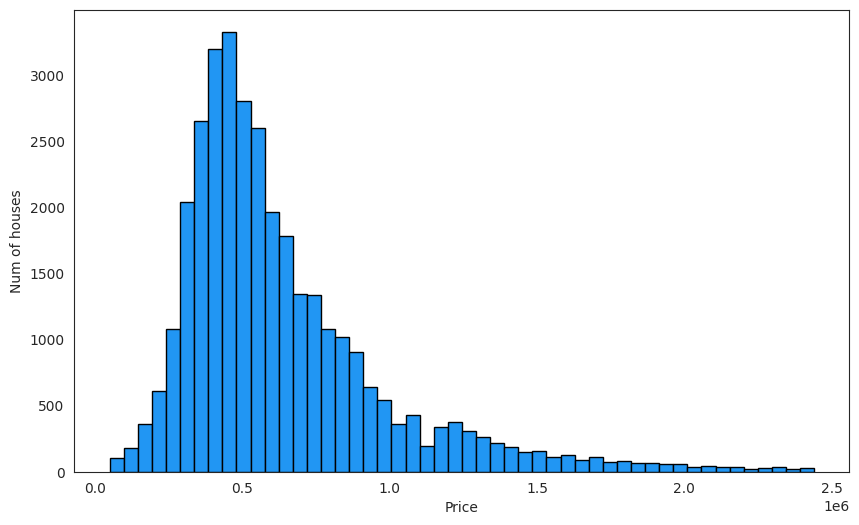

In [116]:
plt.figure(figsize=(10, 6))
plt.hist(all_data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel("Price")
plt.ylabel("Num of houses")
plt.show()

<AxesSubplot: xlabel='FLOOR_AREA', ylabel='PRICE'>

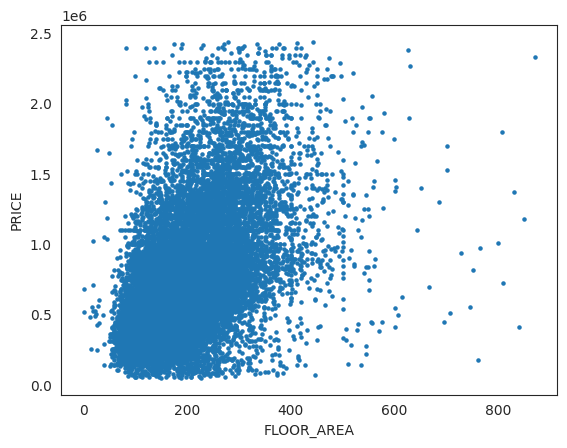

In [117]:
all_data.plot.scatter(x='FLOOR_AREA', y='PRICE', s=5)

array([[<AxesSubplot: title={'center': 'PRICE'}>,
        <AxesSubplot: title={'center': 'BEDROOMS'}>,
        <AxesSubplot: title={'center': 'BATHROOMS'}>],
       [<AxesSubplot: title={'center': 'GARAGE'}>,
        <AxesSubplot: title={'center': 'LAND_AREA'}>,
        <AxesSubplot: title={'center': 'FLOOR_AREA'}>],
       [<AxesSubplot: title={'center': 'BUSINESS_DIST'}>,
        <AxesSubplot: title={'center': 'TRAIN_STATION_DIST'}>,
        <AxesSubplot: title={'center': 'SCHOOL_DIST'}>],
       [<AxesSubplot: title={'center': 'AGE'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

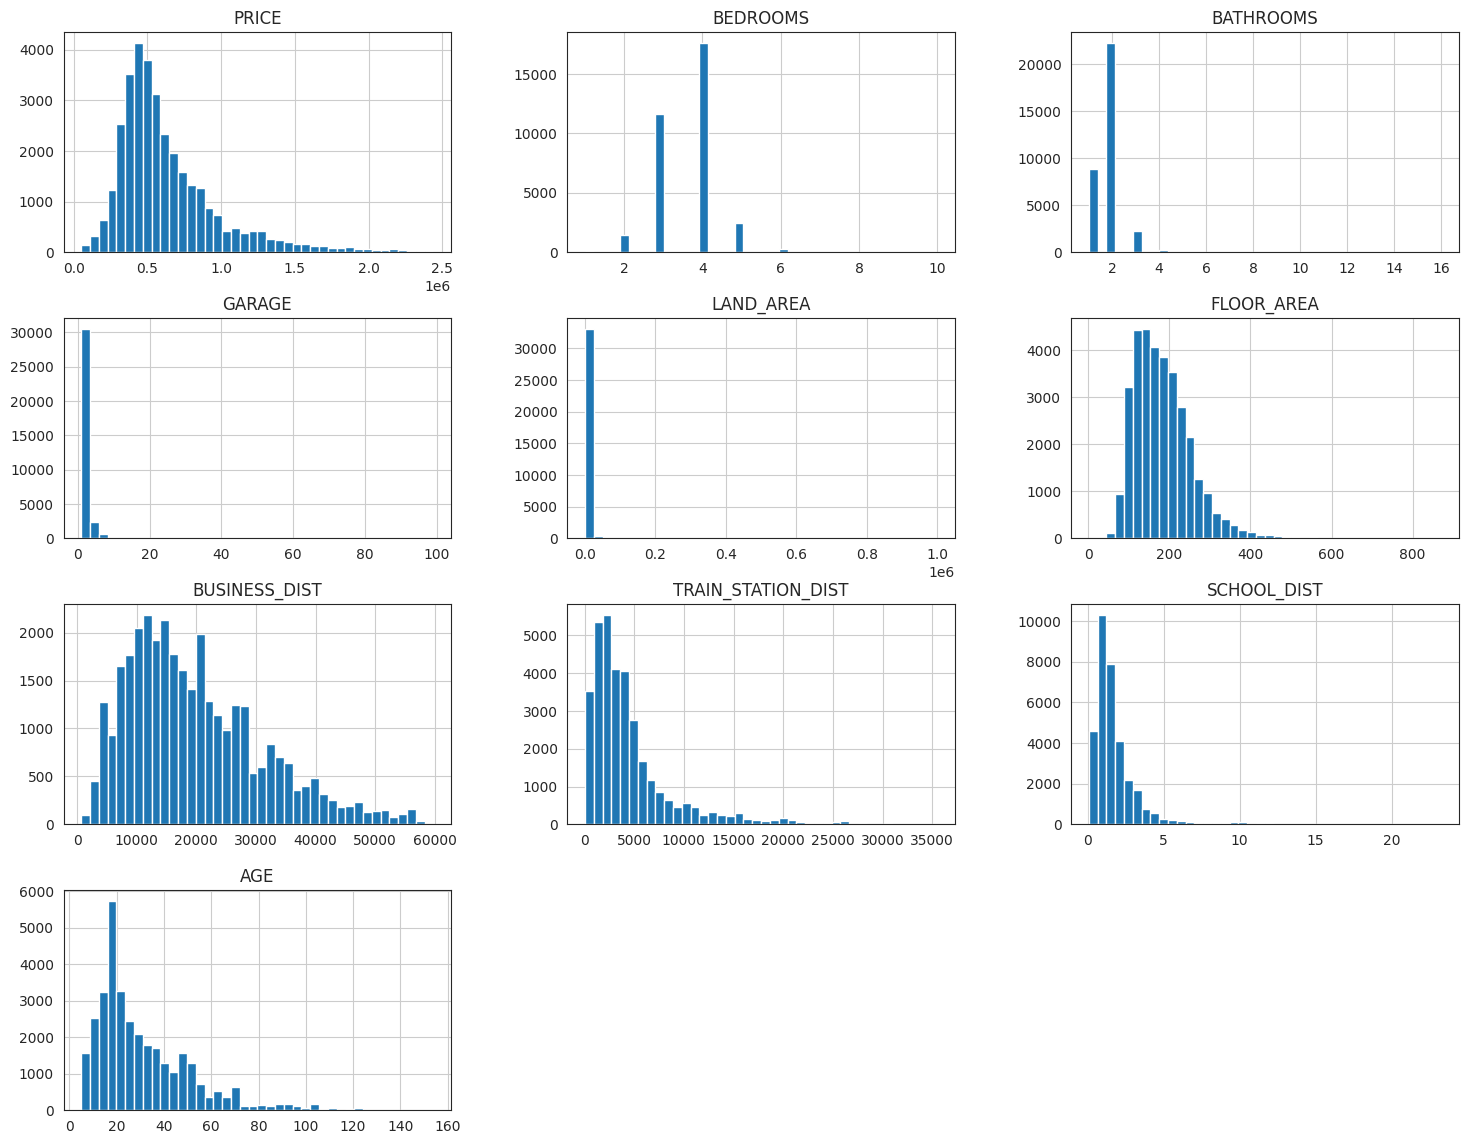

In [118]:
num_cols = list(all_data.select_dtypes(['int64', 'float64']))
all_data[num_cols].hist(bins=40, figsize=(18,14))

In [119]:
# проаналізувати дані та відкинути те, що негативно впливає
sum_before = all_data['PRICE'].count() 

all_data.drop(all_data[all_data['LAND_AREA'] > 1500].index, inplace=True)
all_data.drop(all_data[all_data['TRAIN_STATION_DIST'] > 10000].index, inplace=True)
all_data.drop(all_data[all_data['SCHOOL_DIST'] > 4].index, inplace=True)
all_data.dropna(inplace=True)

sum_after = all_data['PRICE'].count()

print(sum_before, sum_after)

33656 27199


In [120]:
# погіршує score, (дослідити як налаштувати IsolationForest)

# from sklearn.ensemble import IsolationForest
# clf = IsolationForest(random_state=0).fit(all_data)
# outliers = clf.predict(all_data)
# all_data['OUTLIERS'] = outliers
# all_data.drop(all_data[all_data['OUTLIERS'] == -1].index, inplace=True)

In [121]:
all_data.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUSINESS_DIST,TRAIN_STATION_DIST,SCHOOL_DIST,AGE
0,565000,4,2,2.0,600,160,18300,1800,0.828339,19.0
2,287000,3,1,1.0,719,86,22600,1900,1.649178,43.0
3,255000,2,1,2.0,651,59,17900,3600,1.571401,69.0
4,325000,4,1,2.0,466,131,11200,2000,1.514922,24.0
5,409000,4,2,1.0,759,118,27300,1000,1.227219,31.0


In [124]:
# вияснити, які колонки найбільш впливові
X = all_data[
    ['LAND_AREA', 
    'FLOOR_AREA',
    'AGE', 
    'BEDROOMS', 
    'BATHROOMS', 
    'GARAGE', 
    'BUSINESS_DIST', 
    'TRAIN_STATION_DIST', 
    'SCHOOL_DIST']].copy()
y = all_data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [125]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Trainig data r-squared: ', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

Trainig data r-squared:  0.5640080142041578
Test data r-squared:  0.5596428827501885
